<a href="https://colab.research.google.com/github/Rinkal-27/LGMVIP--DataScience/blob/main/Image_to_pencil_sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

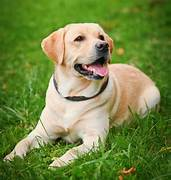

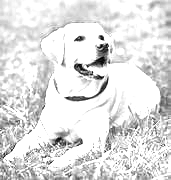

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import urllib.request
import numpy as np

def pencil_sketch(image_url):
    # Downloading the image from the URL
    with urllib.request.urlopen(image_url) as url:
        image_data = url.read()

    # Converting the image data to a numpy array
    nparr = np.frombuffer(image_data, np.uint8)

    # Reading the image using OpenCV
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    # Converting the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Inverting the grayscale image
    inverted_image = cv2.bitwise_not(gray_image)

    # Blurring the inverted image
    blurred_image = cv2.GaussianBlur(inverted_image, (111, 111), 0)

    # Inverting the blurred image
    inverted_blurred_image = cv2.bitwise_not(blurred_image)

    # Creating the pencil sketch by dividing the grayscale image by the inverted blurred image
    pencil_sketch = cv2.divide(gray_image, inverted_blurred_image, scale=256.0)

    return pencil_sketch


# URL of the input image
image_url = 'https://tse1.mm.bing.net/th?id=OIP.yuYto9g41BDnIt-LwK5N6gHaHx&pid=Api&P=0&h=180'
# Function call for creating sketch
sketch = pencil_sketch(image_url)

# Download the image from the URL and display it using cv2_imshow()
with urllib.request.urlopen(image_url) as url:
    image_data = url.read()
image = cv2.imdecode(np.frombuffer(image_data, np.uint8), cv2.IMREAD_COLOR)
cv2_imshow(image)

# Display the pencil sketch using cv2_imshow()
cv2_imshow(sketch)
